# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.metrics import RocCurveDisplay

# Three Model Comparison

In [2]:
df = pd.read_csv("../model_scores.csv")
df.set_index("Unnamed: 0", inplace=True)
df

,train_accuracy,val_accuracy,train_AUC,val_AUC,train_Precision,val_Precision,train_Recall,val_Recall
Unnamed: 0,,,,,,,,
convnet,1.000000,0.970000,1.000000,0.993189,1.000000,0.960784,1.000000,0.98
inceptionv3,0.997500,0.978333,0.999978,0.997639,0.998331,0.958466,0.996667,1.00
baseline,0.942083,0.715000,0.989103,0.765389,0.974084,0.736264,0.908333,0.67


In [3]:
def plot_bar(df, list_of_columns):

    # Configure figure and plots
    total_graphs = len(list_of_columns)
    fig, ax = plt.subplots(1, total_graphs, figsize=(10,5), sharey=True)

    # Create data lists for graphing to loop over
    x_tick_labels = [f"{index[:10]}_" for index in df.index.to_list()]
    width = 0.3

    # Graphs the data
    ax[0].set_ylabel("Scores")
    for i in range(len(ax)):
        x_tick_indexes = np.arange(len(x_tick_labels))
        ax[i].set_ylim([0.6, 1])
        ax[i].set_title(f"{list_of_columns[i].title()}", size=18)
        ax[i].set_xlabel("Models")
        ax[i].bar(x_tick_indexes, df[f"train_{list_of_columns[i]}"], width, label="train", alpha=0.5)
        ax[i].bar(x_tick_indexes + width, df[f"val_{list_of_columns[i]}"], width, label="validation", alpha=0.5)
        ax[i].set_xticks(x_tick_indexes + width / 2, x_tick_labels)
        ax[i].legend(loc='best')
    
    # Saving
    plt.tight_layout()
    plt.savefig(f"../../Images/{list_of_columns[0]}_{list_of_columns[1]}.png")
    plt.show()

    # Return
    return

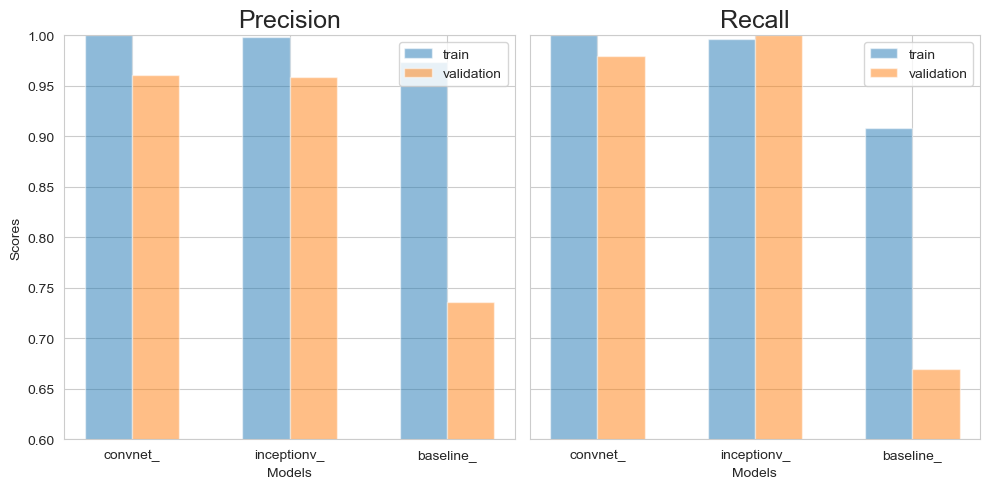

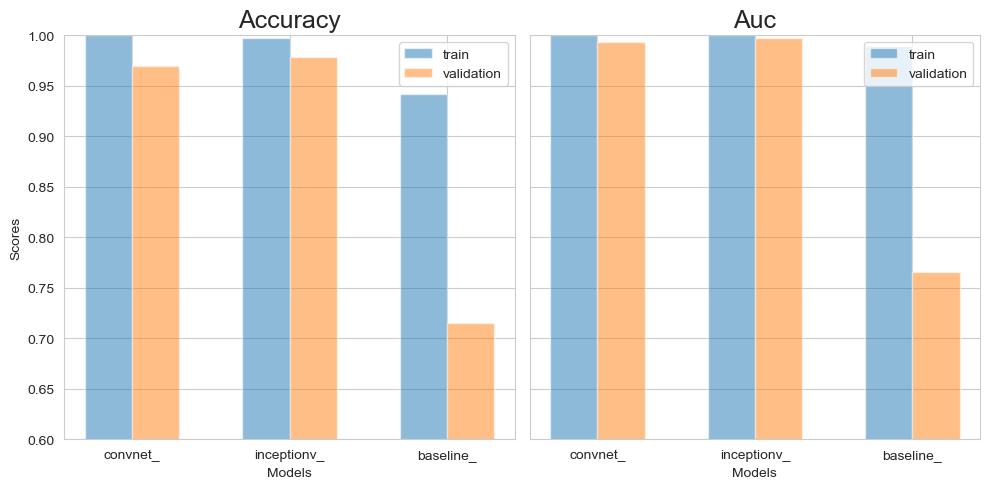

In [4]:
plot_bar(df, ["Precision", "Recall"])
plot_bar(df, ["accuracy", "AUC"])